 ## 1. Load and explore data 

In [25]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [26]:
folder_path = 'Sales_Data/'

for filename in os.listdir(folder_path):
    print(filename)

sales2019_1.csv
sales2019_10.csv
sales2019_11.csv
sales2019_12.csv
sales2019_2.csv
sales2019_3.csv
sales2019_4.csv
sales2019_5.csv
sales2019_6.csv
sales2019_7.csv
sales2019_8.csv
sales2019_9.csv


In [27]:
file_path_rw = 'sales_Data/sales2019_1.csv'

data = pd.read_csv(file_path_rw)
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [28]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9723 entries, 0 to 9722
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          9697 non-null   object
 1   Product           9697 non-null   object
 2   Quantity Ordered  9697 non-null   object
 3   Price Each        9697 non-null   object
 4   Order Date        9697 non-null   object
 5   Purchase Address  9697 non-null   object
dtypes: object(6)
memory usage: 455.9+ KB
None


## 2. Clean and Preprocess data

In [29]:
frames = []
all_length = []
for file in os.listdir(folder_path):
    if file.endswith('.csv'):
        filepath = folder_path + file
        data1 = pd.read_csv(filepath)
        data1 = data1[~(data1.eq(data1.columns).all(axis=1))]
        frames.append(data1)
result = pd.concat(frames, keys=os.listdir(folder_path))
result.to_csv('annualSales2019.csv', index=False)



In [30]:
file_path = 'annualSales2019.csv'

data = pd.read_csv(file_path)
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234.0,iPhone,1.0,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235.0,Lightning Charging Cable,1.0,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236.0,Wired Headphones,2.0,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237.0,27in FHD Monitor,1.0,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238.0,Wired Headphones,1.0,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [31]:
print(data.dtypes)

Order ID            float64
Product              object
Quantity Ordered    float64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object


In [32]:
data['Quantity Ordered'] = pd.to_numeric(data['Quantity Ordered'])
data['Price Each'] = pd.to_numeric(data['Price Each'])
data['Order Date'] = pd.to_datetime(data['Order Date'])

data = data.dropna(how='all')
data.to_csv('annualSales2019.csv', index=False)


In [34]:
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234.0,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215"
1,141235.0,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035"
2,141236.0,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016"
3,141237.0,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001"
4,141238.0,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301"


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186494
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  float64       
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  float64       
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 9.9+ MB


## 3. Reporting

### 3.1 What was the best month for sales? How much was earned that month?

#### 3.1.1 Add 'Month' column

In [36]:
data['Month'] = data['Order Date'].dt.month
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234.0,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1
1,141235.0,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1
2,141236.0,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1
3,141237.0,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1
4,141238.0,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1


In [37]:
cols = list(data.columns)

order_date_index = cols.index('Order Date')
month_index = cols.index('Month')

cols.pop(month_index)
cols.insert(order_date_index + 1, 'Month')
data = data.reindex(columns=cols)

data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Month,Purchase Address
0,141234.0,iPhone,1.0,700.00,2019-01-22 21:25:00,1,"944 Walnut St, Boston, MA 02215"
1,141235.0,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,1,"185 Maple St, Portland, OR 97035"
2,141236.0,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,1,"538 Adams St, San Francisco, CA 94016"
3,141237.0,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,1,"738 10th St, Los Angeles, CA 90001"
4,141238.0,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,1,"387 10th St, Austin, TX 73301"


#### 3.1.2 Add "Sales" column 

In [38]:
data['Sales'] = data['Quantity Ordered'] * data['Price Each']
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Month,Purchase Address,Sales
0,141234.0,iPhone,1.0,700.00,2019-01-22 21:25:00,1,"944 Walnut St, Boston, MA 02215",700.00
1,141235.0,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,1,"185 Maple St, Portland, OR 97035",14.95
2,141236.0,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,1,"538 Adams St, San Francisco, CA 94016",23.98
3,141237.0,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,1,"738 10th St, Los Angeles, CA 90001",149.99
4,141238.0,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,1,"387 10th St, Austin, TX 73301",11.99


In [39]:
cols = list(data.columns)

Price_Each_index = cols.index('Price Each')
sales_index = cols.index('Sales')

cols.pop(sales_index)
cols.insert(Price_Each_index + 1, 'Sales')
data = data.reindex(columns=cols)

data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address
0,141234.0,iPhone,1.0,700.00,700.00,2019-01-22 21:25:00,1,"944 Walnut St, Boston, MA 02215"
1,141235.0,Lightning Charging Cable,1.0,14.95,14.95,2019-01-28 14:15:00,1,"185 Maple St, Portland, OR 97035"
2,141236.0,Wired Headphones,2.0,11.99,23.98,2019-01-17 13:33:00,1,"538 Adams St, San Francisco, CA 94016"
3,141237.0,27in FHD Monitor,1.0,149.99,149.99,2019-01-05 20:33:00,1,"738 10th St, Los Angeles, CA 90001"
4,141238.0,Wired Headphones,1.0,11.99,11.99,2019-01-25 11:59:00,1,"387 10th St, Austin, TX 73301"


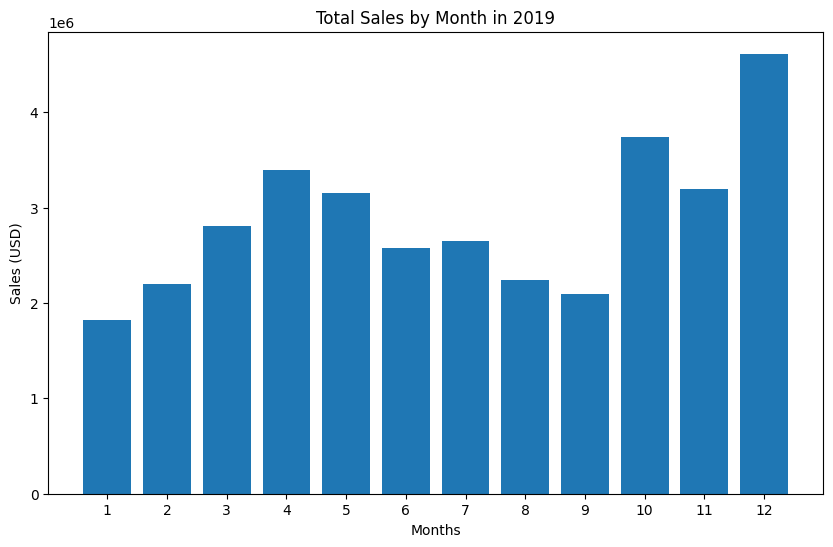

Jan: 1822256.7299999131
Feb: 2202022.4199999655
Mar: 2807100.3800003603
Apr: 3390670.240000703
May: 3152606.750000553
Jun: 2577802.2600001763
Jul: 2647775.760000239
Aug: 2244467.879999993
Sep: 2097560.129999891
Oct: 3736726.8800009703
Nov: 3199603.200000587
Dec: 4613443.34000153
The month with the highest sales is Dec: 4613443.34000153


In [40]:
monthly_sales = data.groupby('Month')['Sales'].sum()

plt.figure(figsize=(10, 6))
plt.bar(monthly_sales.index, monthly_sales.values)
plt.xlabel('Months')
plt.ylabel('Sales (USD)')
plt.title('Total Sales by Month in 2019')
plt.xticks(range(1, 13))
plt.show()


month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 
             7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
monthly_sales.index = monthly_sales.index.map(month_map)
for month, sales in monthly_sales.items():
    print(f'{month}: {sales}')


best_month = monthly_sales.idxmax()
best_month_sales = monthly_sales.max()

print(f'The month with the highest sales is {best_month}: {best_month_sales}')

Tháng 12: Doanh số cao nhất có thể do nhu cầu mua sắm tăng cao trong mùa lễ hội cuối năm. Đây là thời điểm mà nhiều người thường mua sắm (Cho bản thân hoặc làm quà tặng)để chuẩn bị cho các kỳ nghỉ như Giáng sinh và Năm mới.

Tháng 10: Doanh số cao thứ hai có thể do các sự kiện hoặc chương trình khuyến mãi đặc biệt. Tháng 10 cũng là thời điểm mà nhiều người bắt đầu mua sắm cho mùa lễ hội cuối năm.

Tháng 4 và tháng 11: Cả hai tháng này đều có doanh số khá cao. Đối với tháng 4, có thể do nhu cầu mua sắm tăng cao vào mùa xuân. Đối với tháng 11, Black Friday và Cyber Monday có thể là những ngày mua sắm lớn, đóng góp vào doanh số cao.

Tháng 9: Tháng này có doanh số thấp nhất trong năm. Một giả thuyết là sau khi hè kết thúc, nhu cầu mua sắm có thể giảm đi, dẫn đến doanh số thấp

### 3.2 What city has the best sales?

#### 3.2.1 Add "City" column 

In [41]:
address_to_city = lambda address:address.split(',')[1]
data['City'] = data['Purchase Address'].apply(address_to_city)
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address,City
0,141234.0,iPhone,1.0,700.00,700.00,2019-01-22 21:25:00,1,"944 Walnut St, Boston, MA 02215",Boston
1,141235.0,Lightning Charging Cable,1.0,14.95,14.95,2019-01-28 14:15:00,1,"185 Maple St, Portland, OR 97035",Portland
2,141236.0,Wired Headphones,2.0,11.99,23.98,2019-01-17 13:33:00,1,"538 Adams St, San Francisco, CA 94016",San Francisco
3,141237.0,27in FHD Monitor,1.0,149.99,149.99,2019-01-05 20:33:00,1,"738 10th St, Los Angeles, CA 90001",Los Angeles
4,141238.0,Wired Headphones,1.0,11.99,11.99,2019-01-25 11:59:00,1,"387 10th St, Austin, TX 73301",Austin


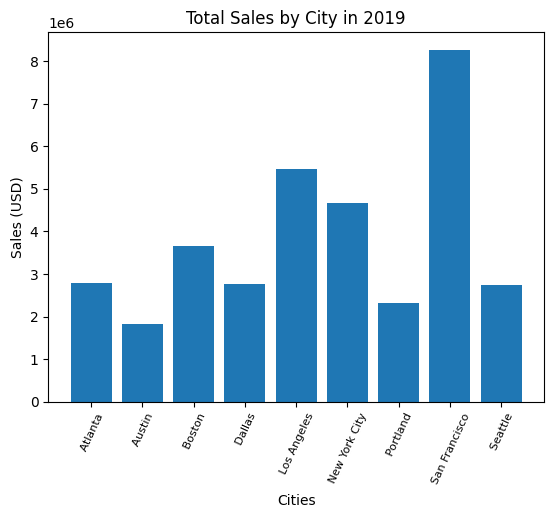

 Atlanta: 2795498.5800003335
 Austin: 1819581.7499999092
 Boston: 3661642.0100008775
 Dallas: 2767975.4000003333
 Los Angeles: 5452570.8000020785
 New York City: 4664317.43000154
 Portland: 2320490.610000031
 San Francisco: 8262203.910003961
 Seattle: 2747755.4800003082
The city with the highest sales is  San Francisco: 8262203.910003961


In [42]:
sales_value_city = data.groupby('City')['Sales'].sum()

cities = [city for city, sales in sales_value_city.items()]
plt.bar(x=cities, height=sales_value_city)
plt.xlabel('Cities')
plt.ylabel('Sales (USD)')
plt.title('Total Sales by City in 2019')
plt.xticks(cities, rotation=65, size=8)
plt.show()

for city, sales in sales_value_city.items():
    print(f'{city}: {sales}')

best_city = sales_value_city.idxmax()
best_city_sales = sales_value_city.max()

print(f'The city with the highest sales is {best_city}: {best_city_sales}')

San Francisco có doanh số cao nhất với tổng cộng $8,262,203.91. Điều này có thể do San Francisco là trung tâm của Silicon Valley, nơi tập trung nhiều công ty công nghệ lớn. Nhu cầu về sản phẩm điện tử ở đây rất cao. Để tăng doanh số, có thể tập trung vào việc mở rộng mạng lưới phân phối và tăng cường quảng cáo tại đây.

Los Angeles và New York City cũng có doanh số khá cao, lần lượt là $5,452,570.80 và $4,664,317.43. Cả hai thành phố này đều có dân số đông đảo và là trung tâm của nhiều hoạt động kinh tế, văn hóa. Có thể tìm cách tăng cường quảng cáo và  cải thiện chăm sóc khách hàng tại những thành phố này.

Austin có doanh số thấp nhất với $1,819,581.75. Tuy nhiên, Austin cũng là một trung tâm công nghệ với sự hiện diện của nhiều công ty công nghệ lớn. Có thể tìm cách tận dụng lợi thế này để tăng doanh số, chẳng hạn như hợp tác với các công ty công nghệ, tạo ra các chương trình khuyến mãi hoặc ưu đãi đặc biệt

### 3.3 What time should we display ads to maximize the likelihood of customer’s buying product?

#### 3.3.1 Add 'Hours' column 

In [43]:
data['Hours'] = data['Order Date'].dt.hour

cols = list(data.columns)

order_date_index = cols.index('Order Date')
hours_index = cols.index('Hours')

cols.pop(hours_index)
cols.insert(order_date_index + 1, 'Hours')
data = data.reindex(columns=cols)

data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Hours,Month,Purchase Address,City
0,141234.0,iPhone,1.0,700.00,700.00,2019-01-22 21:25:00,21,1,"944 Walnut St, Boston, MA 02215",Boston
1,141235.0,Lightning Charging Cable,1.0,14.95,14.95,2019-01-28 14:15:00,14,1,"185 Maple St, Portland, OR 97035",Portland
2,141236.0,Wired Headphones,2.0,11.99,23.98,2019-01-17 13:33:00,13,1,"538 Adams St, San Francisco, CA 94016",San Francisco
3,141237.0,27in FHD Monitor,1.0,149.99,149.99,2019-01-05 20:33:00,20,1,"738 10th St, Los Angeles, CA 90001",Los Angeles
4,141238.0,Wired Headphones,1.0,11.99,11.99,2019-01-25 11:59:00,11,1,"387 10th St, Austin, TX 73301",Austin


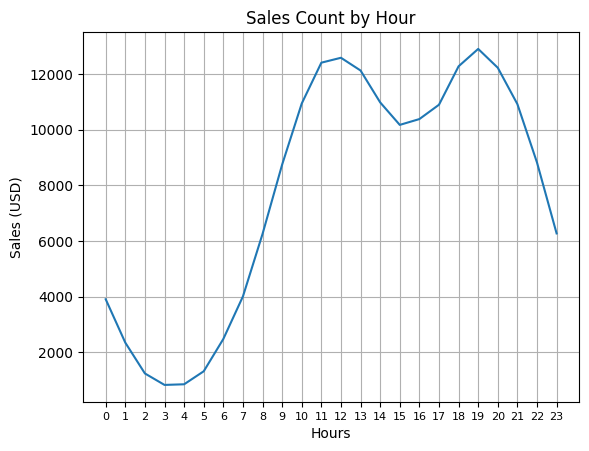

Hours
19    12905
12    12587
11    12411
18    12280
20    12228
13    12129
14    10984
10    10944
21    10921
17    10899
16    10384
15    10175
22     8822
9      8748
23     6275
8      6256
7      4011
0      3910
6      2482
1      2350
5      1321
2      1243
4       854
3       831
Name: Sales, dtype: int64


In [44]:
sales_value_hours = data.groupby('Hours').count()['Sales']
hours = [hour for hour, sales in sales_value_hours.items()]
plt.plot(hours, sales_value_hours)
plt.grid()
plt.xlabel('Hours')
plt.ylabel('Sales (USD)')
plt.title('Sales Count by Hour')
plt.xticks(hours, size=8)
plt.show()

sales_value_hours_sorted = sales_value_hours.sort_values(ascending=False)
print(sales_value_hours_sorted)

3:00- 8:00 : Đây là thời điểm hầu hết mọi người đang ngủ, do đó doanh số bán hàng thấp nhất.

8:00- 12:00 : Thời điểm mà nhiều người bắt đầu ngày làm việc và có thể mua sắm trực tuyến trong giờ nghỉ hoặc giờ trưa.

12:00- 15:00 : Thời gian nghỉ trưa và sau bữa trưa, khi mọi người có thời gian rảnh để mua sắm.

15:00- 19:00 : Đây là thời điểm cuối ngày làm việc và sau giờ làm, khi mọi người thường có thời gian rảnh rỗi để mua sắm trực tuyến. Đây cũng là thời điểm có doanh số cao nhất trong ngày, với doanh số đạt đỉnh vào 19:00 với 12905 đơn

19:00- 23:00 : Đây là thời điểm mà nhiều người đã kết thúc công việc và có thời gian rảnh rỗi để mua sắm trực tuyến. Đây cũng là thời điểm có doanh số cao.

23:00- 3:00 : Đây là thời điểm nhiều người đã đi ngủ, do đó doanh số bán hàng giảm. Tuy nhiên, vẫn có một số người thức khuya và mua sắm trực tuyến.

### 3.4 What products are most often sold together?

In [45]:
from itertools import chain, combinations
from collections import Counter

data_dup = data[data['Order ID'].duplicated(keep=False)]

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

data_dup.head()


,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Hours,Month,Purchase Address,City
41,141275.0,USB-C Charging Cable,1.0,11.95,11.95,2019-01-07 16:06:00,16,1,"610 Walnut St, Austin, TX 73301",Austin
42,141275.0,Wired Headphones,1.0,11.99,11.99,2019-01-07 16:06:00,16,1,"610 Walnut St, Austin, TX 73301",Austin
57,141290.0,Apple Airpods Headphones,1.0,150.00,150.00,2019-01-02 08:25:00,8,1,"4 1st St, Los Angeles, CA 90001",Los Angeles
58,141290.0,AA Batteries (4-pack),3.0,3.84,11.52,2019-01-02 08:25:00,8,1,"4 1st St, Los Angeles, CA 90001",Los Angeles
133,141365.0,Vareebadd Phone,1.0,400.00,400.00,2019-01-10 11:19:00,11,1,"20 Dogwood St, New York City, NY 10001",New York City


In [46]:
GroupProduct = lambda product: ', '.join(product)

data_dup['All products'] = data_dup.groupby('Order ID')['Product'].transform(GroupProduct)
data_dup.head()

C:\Users\rhyma\AppData\Local\Temp\ipykernel_9428\2257653653.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dup['All products'] = data_dup.groupby('Order ID')['Product'].transform(GroupProduct)


,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Hours,Month,Purchase Address,City,All products
41,141275.0,USB-C Charging Cable,1.0,11.95,11.95,2019-01-07 16:06:00,16,1,"610 Walnut St, Austin, TX 73301",Austin,"USB-C Charging Cable, Wired Headphones"
42,141275.0,Wired Headphones,1.0,11.99,11.99,2019-01-07 16:06:00,16,1,"610 Walnut St, Austin, TX 73301",Austin,"USB-C Charging Cable, Wired Headphones"
57,141290.0,Apple Airpods Headphones,1.0,150.00,150.00,2019-01-02 08:25:00,8,1,"4 1st St, Los Angeles, CA 90001",Los Angeles,"Apple Airpods Headphones, AA Batteries (4-pack)"
58,141290.0,AA Batteries (4-pack),3.0,3.84,11.52,2019-01-02 08:25:00,8,1,"4 1st St, Los Angeles, CA 90001",Los Angeles,"Apple Airpods Headphones, AA Batteries (4-pack)"
133,141365.0,Vareebadd Phone,1.0,400.00,400.00,2019-01-10 11:19:00,11,1,"20 Dogwood St, New York City, NY 10001",New York City,"Vareebadd Phone, Wired Headphones"


In [47]:
data_dup = data_dup[['Order ID', 'All products']].drop_duplicates()
print(data_dup.head())

     Order ID                                     All products
41   141275.0           USB-C Charging Cable, Wired Headphones
57   141290.0  Apple Airpods Headphones, AA Batteries (4-pack)
133  141365.0                Vareebadd Phone, Wired Headphones
153  141384.0               Google Phone, USB-C Charging Cable
220  141450.0         Google Phone, Bose SoundSport Headphones


In [48]:
data_dup['All products'].value_counts().head(15)

iPhone, Lightning Charging Cable                        882
Google Phone, USB-C Charging Cable                      856
iPhone, Wired Headphones                                361
Vareebadd Phone, USB-C Charging Cable                   312
Google Phone, Wired Headphones                          303
iPhone, Apple Airpods Headphones                        286
Google Phone, Bose SoundSport Headphones                161
Vareebadd Phone, Wired Headphones                       104
Google Phone, USB-C Charging Cable, Wired Headphones     77
Vareebadd Phone, Bose SoundSport Headphones              60
iPhone, Lightning Charging Cable, Wired Headphones       56
Lightning Charging Cable, USB-C Charging Cable           55
Lightning Charging Cable, AA Batteries (4-pack)          52
Lightning Charging Cable, Lightning Charging Cable       51
AA Batteries (4-pack), Lightning Charging Cable          51
Name: All products, dtype: int64

iPhone và Lightning Charging Cable: Đây là sự kết hợp phổ biến nhất với 882 đơn hàng. Điều này có thể do người dùng iPhone thường cần thêm cáp sạc Lightning như một phụ kiện dự phòng hoặc thay thế.

Google Phone và USB-C Charging Cable: Đây là sự kết hợp thứ hai phổ biến nhất với 856 đơn hàng. Tương tự như iPhone, người dùng Google Phone cũng có nhu cầu mua thêm cáp sạc USB-C.

iPhone và Wired Headphones: Với 361 đơn hàng, có vẻ như nhiều người dùng iPhone cũng mua thêm tai nghe có dây.



Một số giải pháp có thể giúp tăng doanh thu:

Bán kèm phụ kiện: Khi khách hàng mua một sản phẩm nhất định (như iPhone hoặc Google Phone), đề xuất họ mua thêm các phụ kiện liên quan (như cáp sạc hoặc tai nghe). Điều này không chỉ giúp tăng doanh thu mà còn mang lại sự tiện lợi cho khách hàng. 

Combo sản phẩm: Tạo ra các gói sản phẩm bao gồm sản phẩm chính và các phụ kiện liên quan với một mức giá hấp dẫn. Ví dụ, một combo có thể bao gồm một iPhone, một cáp sạc Lightning, và một đôi tai nghe có dây.

Chương trình khuyến mãi: Có thể tổ chức các chương trình khuyến mãi như “Mua 1 Tặng 1” hoặc giảm giá khi mua sản phẩm và phụ kiện cùng lúc.

### 3.5 What product sold the most? 

C:\Users\rhyma\AppData\Local\Temp\ipykernel_9428\130375508.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products_ls, rotation=90, size=8)


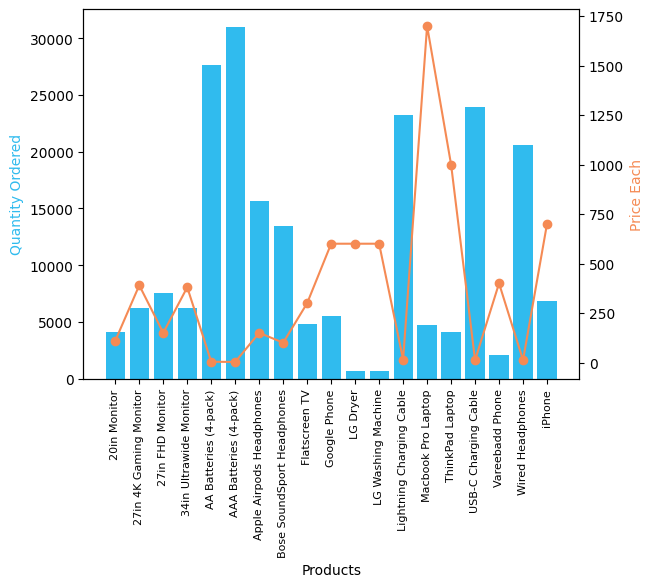

In [49]:
all_products = data.groupby('Product').sum()['Quantity Ordered']
prices = data.groupby('Product').mean()['Price Each']
products_ls = [product for product, quant in all_products.items()]

x = products_ls
y1 = all_products
y2 = prices

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(x, y1, color='#30BBEE')
ax2.plot(x, y2,'o-', color='#F58A54')

ax1.set_xticklabels(products_ls, rotation=90, size=8)
ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Ordered', color='#30BBEE')
ax2.set_ylabel('Price Each', color='#F58A54')

plt.show()

Sản phẩm bán chạy nhất: “AAA Batteries (4-pack)” và “AA Batteries (4-pack)” là hai sản phẩm có số lượng đơn hàng cao nhất, với lần lượt là 31,017 và 27,635 đơn hàng. Điều này có thể do giá của chúng thấp hơn nhiều so với các sản phẩm khác.

Sản phẩm bán chậm nhất: “LG Dryer” và “LG Washing Machine” là hai sản phẩm có số lượng đơn hàng thấp nhất, chỉ với 646 và 666 đơn hàng. Cả hai sản phẩm này đều là các thiết bị gia dụng lớn với tuổi thọ  cao sử dụng lâu dài. Do đó, khách hàng không cần phải mua thay thế thường xuyên như các sản phẩm tiêu dùng khác.

Giá trung bình: “Macbook Pro Laptop” có giá trung bình cao nhất là $1700.00, trong khi “AAA Batteries (4-pack)” có giá trung bình thấp nhất là $2.99.